# Roller Coaster

#### Overview

This project is slightly different than others you have encountered thus far. Instead of a step-by-step tutorial, this project contains a series of open-ended requirements which describe the project you'll be building. There are many possible ways to correctly fulfill these requirements, and you should expect to use the internet, Codecademy, and other resources when you encounter a problem that you cannot easily solve.

#### Project Goals

You will work to create several data visualizations that will give you insight into the world of roller coasters.

## Prerequisites

In order to complete this project, you should have completed the first two lessons in the [Data Analysis with Pandas Course](https://www.codecademy.com/learn/data-processing-pandas) and the first two lessons in the [Data Visualization in Python course](https://www.codecademy.com/learn/data-visualization-python). This content is also covered in the [Data Scientist Career Path](https://www.codecademy.com/learn/paths/data-science/).

## Project Requirements

1. Roller coasters are thrilling amusement park rides designed to make you squeal and scream! They take you up high, drop you to the ground quickly, and sometimes even spin you upside down before returning to a stop. Today you will be taking control back from the roller coasters and visualizing data covering international roller coaster rankings and roller coaster statistics.

   Roller coasters are often split into two main categories based on their construction material: **wood** or **steel**. Rankings for the best wood and steel roller coasters from the 2013 to 2018 [Golden Ticket Awards](http://goldenticketawards.com) are provded in `'Golden_Ticket_Award_Winners_Wood.csv'` and `'Golden_Ticket_Award_Winners_Steel.csv'`, respectively. Load each csv into a DataFrame and inspect it to gain familiarity with the data.

In [237]:
# 1 
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import sem
import statsmodels.api as sm
from statsmodels.formula.api import ols

# load rankings data
wood=pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
#print(wood.head())
#print(wood.info())

# load rankings data
steel=pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
#print(steel.head())
#print(steel.info())

2. Write a function that will plot the ranking of a given roller coaster over time as a line. Your function should take a roller coaster's name and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with `"El Toro"` as the roller coaster name and the wood ranking DataFrame. What issue do you notice? Update your function with an additional argument to alleviate the problem, and retest your function.

<Figure size 720x576 with 0 Axes>

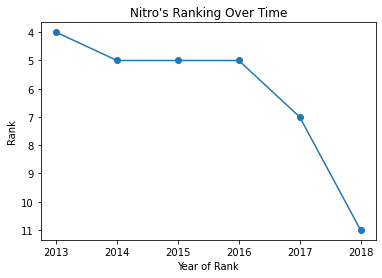

<Figure size 432x288 with 0 Axes>

<Figure size 720x576 with 0 Axes>

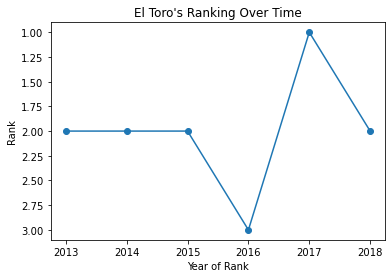

<Figure size 432x288 with 0 Axes>

In [253]:
# 2
# Create a function to plot rankings over time for 1 roller coaster
def time_ranking(coaster_name, park_name, data):
    coaster = coaster_name.title()
    park = park_name.title()
    df = data[(data.Name == coaster) & (data.Park == park)]
    plt.figure(figsize=(10,8))
    fig, ax = plt.subplots()
    ax.plot(df['Year of Rank'], df.Rank, marker='o')
    ax.invert_yaxis()
    plt.xlabel('Year of Rank')
    plt.ylabel('Rank')
    plt.title(coaster + "'s Ranking Over Time")
    fig=plt.gcf()
    plt.show()
    plt.draw()
    file_name=coaster.replace(' ','_') + '_' + park.replace(' ','_')
    return fig.savefig('{}.png'.format(file_name))

# Create a plot of El Toro ranking over time
time_ranking('nitro', 'six flags great adventure', steel)
time_ranking('el toro', 'six flags great adventure', wood)

3. Write a function that will plot the ranking of two given roller coasters over time as lines. Your function should take both roller coasters' names and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with `"El Toro"` as one roller coaster name, `"Boulder Dash"` as the other roller coaster name, and the wood ranking DataFrame. What issue do you notice? Update your function with two additional arguments to alleviate the problem, and retest your function.

<Figure size 720x576 with 0 Axes>

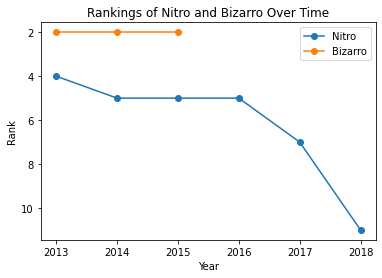

<Figure size 432x288 with 0 Axes>

<Figure size 720x576 with 0 Axes>

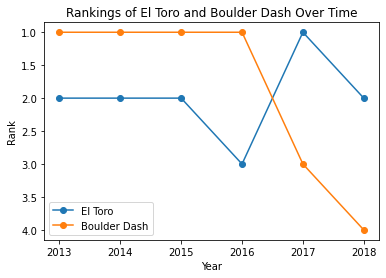

<Figure size 432x288 with 0 Axes>

In [254]:
# 3
# Create a function to plot rankings over time for 2 roller coasters
def two_coasters_ranking(coaster1_name, coaster2_name, coaster1_park, coaster2_park, data):
    name1 = coaster1_name.title()
    name2 = coaster2_name.title()
    park1 = coaster1_park.title()
    park2 = coaster2_park.title()
    df1 = data[(data.Name == name1) & (data.Park == park1)]
    df2 = data[(data.Name == name2) & (data.Park == park2)]
    plt.figure(figsize=(10,8))
    fig, ax = plt.subplots()
    ax.plot(df1['Year of Rank'], df1.Rank, marker='o')
    ax.plot(df2['Year of Rank'], df2.Rank, marker='o')
    ax.invert_yaxis()
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.title('Rankings of ' + name1 + ' and ' + name2 + ' Over Time')
    ax.legend([name1, name2])
    fig=plt.gcf()
    plt.show()
    plt.draw()
    file_name=name1.replace(' ','_') + '_' + park1.replace(' ','_') + '_' + name2.replace(' ','_') + '_' + park2.replace(' ','_')
    return fig.savefig('{}.png'.format(file_name))

# Create a plot of El Toro and Boulder Dash roller coasters
two_coasters_ranking('Nitro', 'Bizarro', 'Six Flags Great Adventure', 'Six Flags New England', steel)
two_coasters_ranking('El Toro', 'Boulder Dash', 'Six Flags Great Adventure', 'Lake Compounce', wood)

4. Write a function that will plot the ranking of the top `n` ranked roller coasters over time as lines. Your function should take a number `n` and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   For example, if `n == 5`, your function should plot a line for each roller coaster that has a rank of `5` or lower.
   
   Call your function with a value of `n` and either the wood ranking or steel ranking DataFrame.

<Figure size 720x576 with 0 Axes>

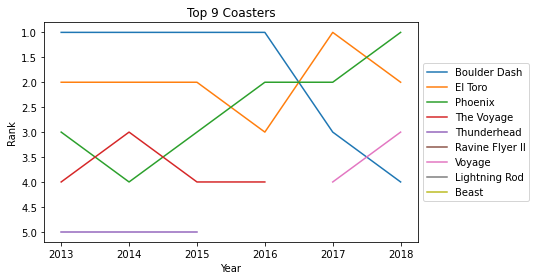

<Figure size 432x288 with 0 Axes>

In [255]:
# 4
# Create a function to plot top n rankings over time
def top_coasters(n, data):
    df = data[data.Rank <= n]
    coasters = []
    for i in df.Name:
        if i not in coasters:
            coasters.append(i)
    plt.figure(figsize=(10,8))
    fig, ax = plt.subplots()
    for i in coasters:
        i_df = df[df.Name == i]
        ax.plot(i_df['Year of Rank'], i_df.Rank)
    ax.invert_yaxis()
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.title('Top {} Coasters'.format(len(coasters)))
    plt.tight_layout()
    ax.legend(coasters, loc='center left', bbox_to_anchor=(1, 0.5))
    fig=plt.gcf()
    plt.show()
    plt.draw()
    return fig.savefig('ranking_top_{}_coaster.png'.format(len(coasters)))
    
# Create a plot of top n rankings over time
top_coasters(5, wood)
plt.clf()

5. Now that you've visualized rankings over time, let's dive into the actual statistics of roller coasters themselves. [Captain Coaster](https://captaincoaster.com/en/) is a popular site for recording roller coaster information. Data on all roller coasters documented on Captain Coaster has been accessed through its API and stored in `roller_coasters.csv`. Load the data from the csv into a DataFrame and inspect it to gain familiarity with the data.

In [256]:
# 5
# load roller coaster data
coaster_df = pd.read_csv('roller_coasters.csv')
#print(coaster_df.head())
#print(coaster_df.info())

6. Write a function that plots a histogram of any numeric column of the roller coaster DataFrame. Your function should take a DataFrame and a column name for which a histogram should be constructed as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame and one of the column names.

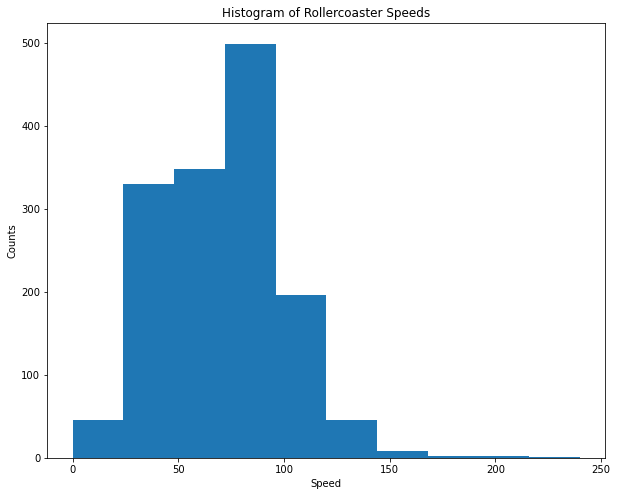

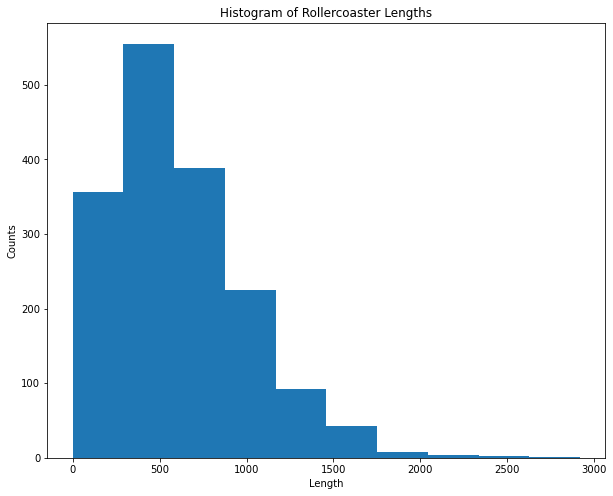

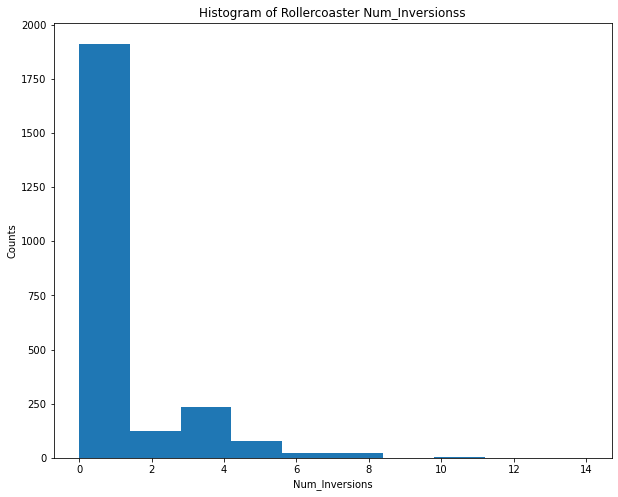

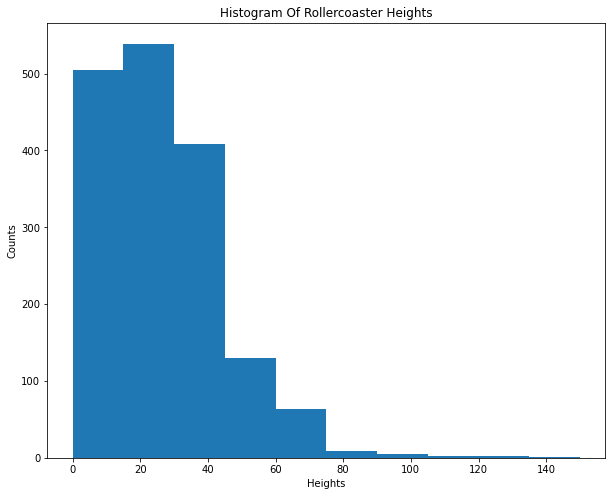

In [257]:
# 6
# Create a function to plot histogram of column values
def coaster_histogram(data, column):
    column = column.lower()
    plt.figure(figsize=(10,8))
    plt.hist(data[column].dropna())
    plt.xlabel(column.title())
    plt.ylabel('Counts')
    plt.title('Histogram of Rollercoaster {}s'.format(column.title()))
    fig=plt.gcf()
    plt.show()
    plt.draw()
    return fig.savefig('rollercoaster_{}_histogram.png'.format(column))

# Create histogram of roller coaster speed
coaster_histogram(coaster_df, 'speed')
plt.clf()
plt.close()

# Create histogram of roller coaster length
coaster_histogram(coaster_df, 'length')
plt.clf()
plt.close()

# Create histogram of roller coaster number of inversions
coaster_histogram(coaster_df, 'num_inversions')
plt.clf()
plt.close()

# Create a function to plot histogram of height values
def plot_heights(data):
    heights = data.height
    plt.figure(figsize=(10,8))
    plt.hist(heights.dropna(), range=(0,150))
    plt.xlabel('Heights')
    plt.ylabel('Counts')
    plt.title('Histogram of Rollercoaster {}'.format('heights').title())
    fig=plt.gcf()
    plt.show()
    plt.draw()
    return fig.savefig('rollercoaster_heights_histogram.png')

# Create a histogram of roller coaster height
plot_heights(coaster_df)
plt.clf()
plt.close()

7. Write a function that creates a bar chart showing the number of inversions for each roller coaster at an amusement park. Your function should take the roller coaster DataFrame and an amusement park name as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame and amusement park name.

<Figure size 720x576 with 0 Axes>

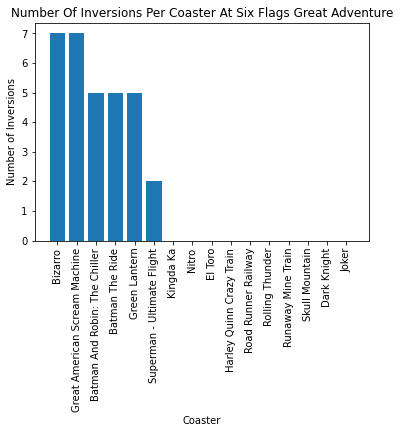

In [258]:
# 7
# Create a function to plot inversions by coaster at park
def coaster_inversions(data, park):
    park = park.title()
    park_df = data[data.park == park]
    park_df = park_df.sort_values('num_inversions', ascending=False)
    x_values = range(len(park_df.num_inversions))
    coasters = park_df.name.unique()
    plt.figure(figsize=(10,8))
    fig, ax = plt.subplots()
    plt.bar(x_values, park_df.num_inversions)
    ax.set_xticks(x_values)
    ax.set_xticklabels(coasters, rotation=90)
    plt.xlabel('Coaster')
    plt.ylabel('Number of Inversions')
    plt.title('Number of Inversions per Coaster at {}'.format(park).title())
    fig=plt.gcf()
    plt.show()
    plt.draw()
    file_name=park.lower().replace(' ', '_')
    return fig.savefig('num_inversions_at_{}.png'.format(file_name))

# Create barplot of inversions by roller coasters
coaster_inversions(coaster_df, 'Six Flags Great Adventure')
plt.clf()
plt.close()

8. Write a function that creates a pie chart that compares the number of operating roller coasters (`'status.operating'`) to the number of closed roller coasters (`'status.closed.definitely'`). Your function should take the roller coaster DataFrame as an argument. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame.

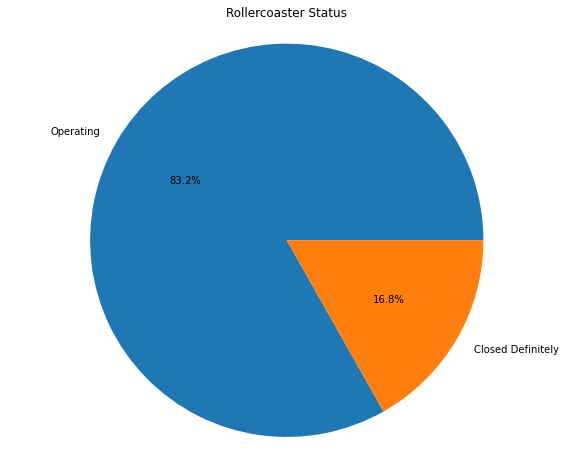

In [259]:
# 8
# Create a function to plot a pie chart of status.operating
def coaster_status(data):
    operating=data[data.status == 'status.operating']
    closed=data[data.status == 'status.closed.definitely']
    num_operating=len(operating)
    num_closed=len(closed)
    status=[num_operating, num_closed]
    labels=['Operating', 'Closed Definitely']
    plt.figure(figsize=(10,8))
    plt.pie(status, labels=labels, autopct='%0.1f%%')
    plt.axis('equal')
    plt.title('Rollercoaster Status')
    fig=plt.gcf()
    plt.show()
    plt.draw()
    return fig.savefig('rollercoaster_operation_status.png')

# Create pie chart of roller coasters
coaster_status(coaster_df)
plt.clf()
plt.close()

9. Write a function that creates a scatter plot of two numeric columns of the roller coaster DataFrame. Your function should take the roller coaster DataFrame and two-column names as arguments. Make sure to include informative labels that describe your visualization.
   
   Call your function with the roller coaster DataFrame and two-column names.

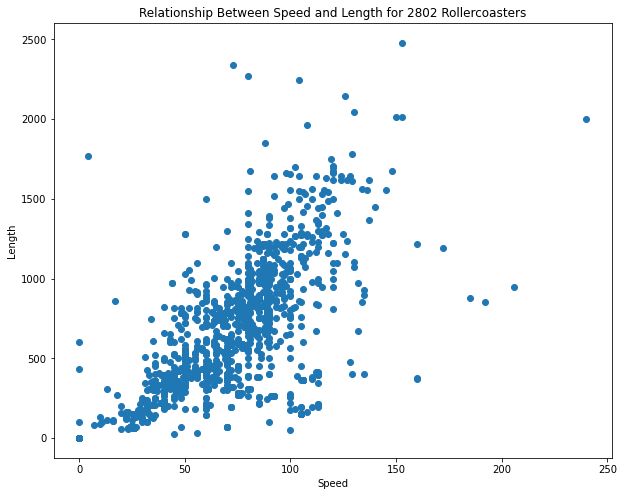

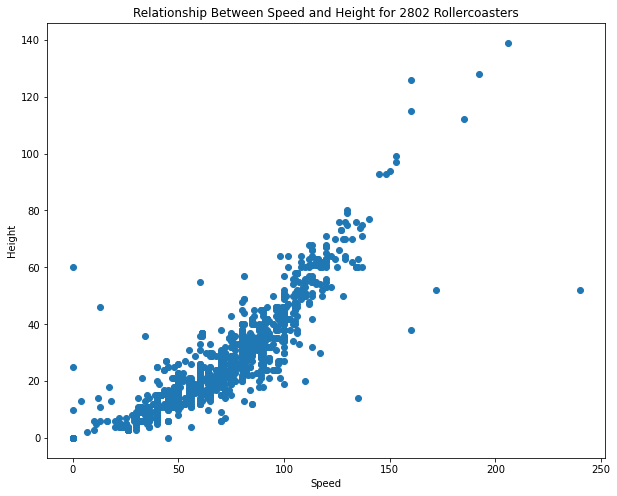

In [260]:
# 9
# Create a function to plot scatter of any two columns
def scatter_plot_generator(data, column1, column2):
    column1=column1.lower()
    column2=column2.lower()
    plt.figure(figsize=(10,8))
    plt.scatter(data[column1], data[column2])
    plt.xlabel(column1.title())
    plt.ylabel(column2.title())
    plt.title('Relationship Between {} and {} for {} Rollercoasters'.format(column1.title(), column2.title(), len(data.name)))
    fig=plt.gcf()
    plt.show()
    plt.draw()
    file_name=column1.replace(' ','_') + '_' + column2.replace(' ','_')
    return fig.savefig('{}_scatter.png'.format(file_name))

scatter_plot_generator(coaster_df, 'speed', 'length')
plt.clf()
plt.close()

# Create a function to plot scatter of speed vs height
def plot_speed_height_scatter(data):
    df=data[data.height <= 140]
    plt.figure(figsize=(10,8))
    plt.scatter(df.speed, df.height)
    plt.xlabel('Speed')
    plt.ylabel('Height')
    plt.title('Relationship Between {} and {} for {} Rollercoasters'.format('Speed', 'Height', len(data.name)))
    fig=plt.gcf()
    plt.show()
    plt.draw()
    return fig.savefig('speed_height_scatter.png')
              
# Create a scatter plot of roller coaster height by speed
plot_speed_height_scatter(coaster_df)
plt.clf()
plt.close()

10. Part of the fun of data analysis and visualization is digging into the data you have and answering questions that come to your mind.

    Some questions you might want to answer with the datasets provided include:
    - What roller coaster seating type is most popular? And do different seating types result in higher/faster/longer roller coasters?
    - Do roller coaster manufactures have any specialties (do they focus on speed, height, seating type, or inversions)?
    - Do amusement parks have any specialties?
    
    What visualizations can you create that answer these questions, and any others that come to you? Share the questions you ask and the accompanying visualizations you create on the Codecademy forums.

<Figure size 720x576 with 0 Axes>

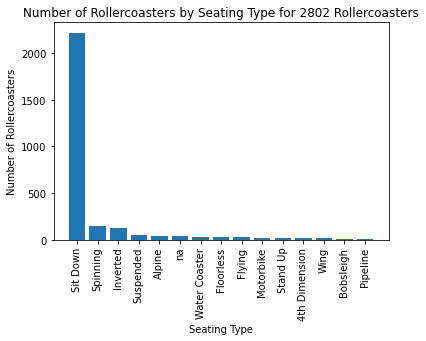

Explore Relationship Between Height and Seating Type:


<Figure size 432x288 with 0 Axes>

<Figure size 720x576 with 0 Axes>

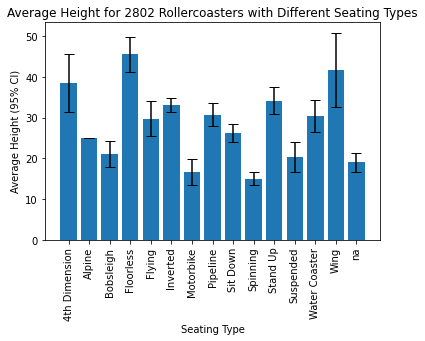

<Figure size 720x576 with 0 Axes>

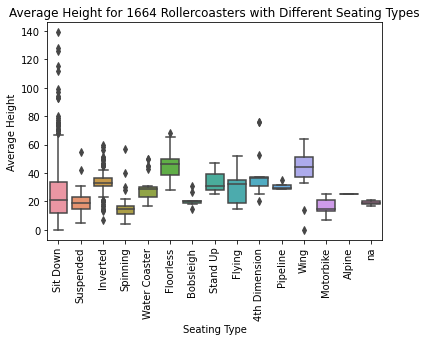

ANOVA to compare means:
                  df        sum_sq      mean_sq         F    PR(>F)
seating_type    14.0  3.592162e+04  2565.830048  2.112916  0.009149
Residual      1652.0  2.006114e+06  1214.354779       NaN       NaN
p<<0.05

Explore Relationship Between Speed and Seating Type:


<Figure size 720x576 with 0 Axes>

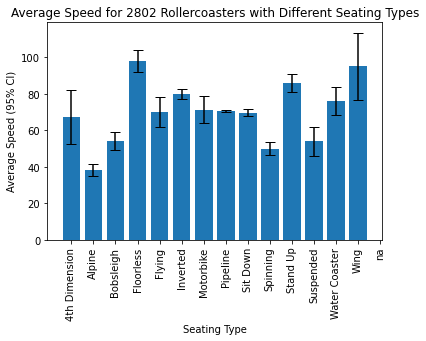

<Figure size 720x576 with 0 Axes>

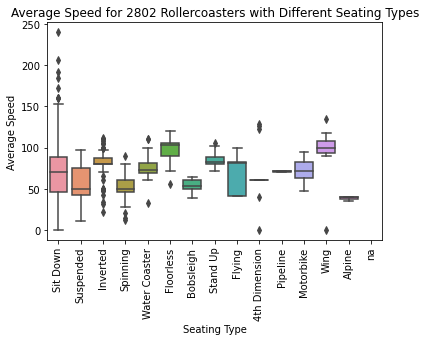

                  df        sum_sq      mean_sq         F        PR(>F)
seating_type    14.0  8.236966e+04  5883.546953  7.803567  3.642787e-16
Residual      1464.0  1.103792e+06   753.956088       NaN           NaN
p<<<0.001

Explore Relationship Between Length and Seating Type:


<Figure size 720x576 with 0 Axes>

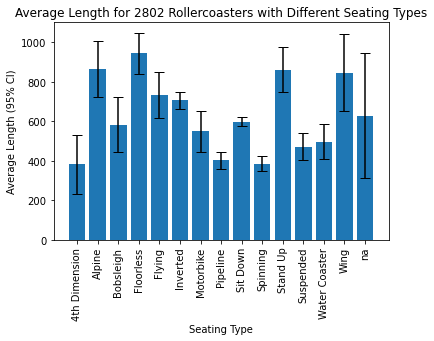

<Figure size 720x576 with 0 Axes>

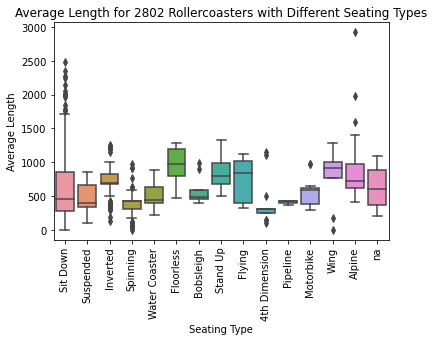

                  df        sum_sq       mean_sq         F        PR(>F)
seating_type    14.0  1.480886e+07  1.057776e+06  7.171482  1.232869e-14
Residual      1660.0  2.448458e+08  1.474975e+05       NaN           NaN
p<<<0.05


In [262]:
# 1) What roller coaster seating type is most popular?
# create a bar chart to explore popularity of seating types
def visualize_seating_types(data):
    df=data.sort_values('seating_type', ascending=False)
    seating_df=df.seating_type.value_counts().to_frame()
    seating_df=pd.DataFrame(counts)
    seating_df=seating_df.reset_index()
    seating_df.columns=['seating_type', 'number']
    seating_types=seating_df.seating_type
    x_values=range(len(seating_df.seating_type))
    plt.figure(figsize=(10,8))
    fig, ax=plt.subplots()
    plt.bar(x_values, seating_df.number)
    ax.set_xticks(x_values)
    ax.set_xticklabels(seating_types, rotation=90)
    plt.xlabel('Seating Type')
    plt.ylabel('Number of Rollercoasters')
    plt.title('{} by {} for {} Rollercoasters'.format('Number of Rollercoasters', 'Seating Type', len(df.name)))
    fig=plt.gcf()
    plt.show()
    plt.draw()
    return fig.savefig('coaster_seating_types.png')

visualize_seating_types(coaster_df)

# ANSWER: Sit down seating appears to be most popular!

# 2) And do different seating types result in higher/faster/longer roller coasters?
def bar_seating_type_versus_variable(data, variable):
    variable=variable.lower()
    df=data.groupby('seating_type')
    avg_per_type=df[variable].mean()
    avg_df=pd.DataFrame(avg_per_type)
    avg_df=avg_df.reset_index()
    avg_df.columns=['seating_type', 'avg']
    seating_types=avg_df.seating_type
    error=df[variable].sem() * 1.96
    x_values=range(len(seating_types))
    plt.figure(figsize=(10,8))
    fig, ax=plt.subplots()
    plt.bar(x_values, avg_df.avg, yerr=error, capsize=5)
    ax.set_xticks(x_values)
    ax.set_xticklabels(seating_types, rotation=90)
    plt.xlabel('Seating Type')
    plt.ylabel('Average ' + variable.title() + ' (95% CI)')
    plt.title('Average {} for {} Rollercoasters with Different Seating Types'.format(variable.title(), len(data.name)))
    fig=plt.gcf()
    plt.show()
    plt.draw()
    file_name=variable.replace(' ','_')
    return fig.savefig('bar_chart_seating_type_versus_coaster_{}.png'.format(file_name))

def box_seating_type_versus_variable(data, variable):
    variable=variable.lower()
    if variable == 'height':
        data=data[data[variable] <= 140]
    else:
        data=data
    seating_types=data.seating_type.unique()
    x_values=range(len(seating_types))
    plt.figure(figsize=(10,8))
    fig, ax=plt.subplots()
    sns.boxplot(x=data.seating_type, y=data[variable])
    ax.set_xticklabels(seating_types, rotation=90)
    plt.xlabel('Seating Type')
    plt.ylabel('Average ' + variable.title())
    plt.title('Average {} for {} Rollercoasters with Different Seating Types'.format(variable.title(), len(data.name)))
    fig=plt.gcf()
    plt.show()
    plt.draw()
    file_name=variable.replace(' ','_')
    return fig.savefig('box_chart_seating_type_versus_coaster_{}.png'.format(file_name))

print('Explore Relationship Between Height and Seating Type:')
bar_seating_type_versus_variable(coaster_df, 'height')
plt.clf()
plt.close()
box_seating_type_versus_variable(coaster_df, 'height')
plt.clf()
plt.close()
print('ANOVA to compare means:')
mod=ols('height ~ seating_type', data=coaster_df).fit()
aov_table=sm.stats.anova_lm(mod, type=2)
print(aov_table)
print('p<<0.05')
print('')
print('Explore Relationship Between Speed and Seating Type:')
bar_seating_type_versus_variable(coaster_df, 'speed')
plt.clf()
plt.close()
box_seating_type_versus_variable(coaster_df, 'speed')
plt.clf()
plt.close()
mod=ols('speed ~ seating_type', data=coaster_df).fit()
aov_table=sm.stats.anova_lm(mod, type=2)
print(aov_table)
print('p<<<0.001')
print('')
print('Explore Relationship Between Length and Seating Type:')
bar_seating_type_versus_variable(coaster_df, 'length')
plt.clf()
plt.close()
box_seating_type_versus_variable(coaster_df, 'length')
plt.clf()
plt.close()
mod=ols('length ~ seating_type', data=coaster_df).fit()
aov_table=sm.stats.anova_lm(mod, type=2)
print(aov_table)
print('p<<<0.05')

In [ ]:
# Do roller coaster manufactures have any specialties (do they focus on speed, height, seating type, or inversions)?

In [ ]:
# Do amusement parks have any specialties?

## Solution

Great work! Visit [our forums](https://discuss.codecademy.com/t/roller-coaster-challenge-project-python-pandas/462378) or the file **Roller Coaster_Solution.ipynb** to compare your project to our sample solution code. You can also learn how to host your own solution on GitHub so you can share it with other learners! Your solution might look different from ours, and that's okay! There are multiple ways to solve these projects, and you'll learn more by seeing others' code.